# Mask-Detection using Transfer Learning
In this assignment you will use transfer learning to detect if a person is wearing a mask or not. You will use a pre-trained model (MobileNet-V1) trained on the ImageNet dataset and use a modified version of the [kaggle mask dataset](https://www.kaggle.com/prasoonkottarathil/face-mask-lite-dataset) to perform transfer learning.



You will follow the general machine learning workflow.

1. Examine and understand the data
1. Build Dataset
1. Compose the model
   * Load in the pretrained base model (and pretrained weights)
   * Stack the classification layers on top
1. Train the model
1. Evaluate model

\







In [ ]:
# Mask-detection assignment/module development
# Copyright (c) 2020 Srivatsan Krishnan
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

### Recap
Remember, a pre-trained model is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task. You either use the pretrained model as is or use transfer learning to customize this model to a given task. The intuition behind transfer learning for image classification is that if a model is trained on a large and general enough dataset, this model will effectively serve as a generic model of the visual world. You can then take advantage of these learned feature maps without having to start from scratch by training a large model on a large dataset.


In [ ]:
#Proposed fix: Joe addition
!pip install tensorflow==2.15

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 1.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation: t

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from tensorflow.keras.preprocessing import image_dataset_from_directory

# 1. Build the dataset
### Download the dataset
You will use a dataset containing several hundreds images of a person with and without a mask. First you will download and extract a zip file containing the images. After running the below two cells you should be able to see the dataset in the appropriate directory structure on the left tab. The dataset contains only train and validation datasets.

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown --id 1orz3ne4uiZXjj-UQZl0_dN0xau8mNQUx

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1orz3ne4uiZXjj-UQZl0_dN0xau8mNQUx
From (redirected): https://drive.google.com/uc?id=1orz3ne4uiZXjj-UQZl0_dN0xau8mNQUx&confirm=t&uuid=e8554127-30ae-46ee-bf24-be6917e127ec
To: /content/ESE3600_dataset.zip
100% 2.01G/2.01G [00:22<00:00, 90.3MB/s]


In [ ]:
!unzip ESE3600_dataset.zip

Archive:  ESE3600_dataset.zip
   creating: ESE3600_dataset/train/
   creating: ESE3600_dataset/train/with_mask/
  inflating: ESE3600_dataset/train/with_mask/with-mask-default-mask-seed0000.png  
  inflating: ESE3600_dataset/train/with_mask/with-mask-default-mask-seed0001.png  
  inflating: ESE3600_dataset/train/with_mask/with-mask-default-mask-seed0002.png  
  inflating: ESE3600_dataset/train/with_mask/with-mask-default-mask-seed0003.png  
  inflating: ESE3600_dataset/train/with_mask/with-mask-default-mask-seed0004.png  
  inflating: ESE3600_dataset/train/with_mask/with-mask-default-mask-seed0005.png  
  inflating: ESE3600_dataset/train/with_mask/with-mask-default-mask-seed0006.png  
  inflating: ESE3600_dataset/train/with_mask/with-mask-default-mask-seed0007.png  
  inflating: ESE3600_dataset/train/with_mask/with-mask-default-mask-seed0008.png  
  inflating: ESE3600_dataset/train/with_mask/with-mask-default-mask-seed0009.png  
  inflating: ESE3600_dataset/train/with_mask/with-mask-def

Next, define the path to the train and validation directories.

In [ ]:
path_to_zip = "/content/"
PATH = os.path.join(os.path.dirname(path_to_zip), 'ESE3600_dataset/')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

The next step is to create a `tf.data.Dataset` for training and validation using the `tf.keras.preprocessing.image_dataset_from_directory` utility.

In the below cell, create **'train_dataset'** and **'validation_dataset'** using the utility mentioned above. The original images are 1024 x 1024, but you can define your image size as 96 x 96 for this assignment. Define a batch size of your choice - you can tune this hyperparamter to improve model performance.

In [ ]:
# Create train and validation datasets
IMG_SIZE = (96, 96)
BATCH_SIZE = 100

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
)


Found 602 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


### Visualize Train Examples
Like you have done many times in the past, visualize training examples. View the first 9 images from the training dataset. For each image plot, set the title to the corresponding class name i.e., 'with_mask' or 'without_mask'.

***Hint1:*** How do you relate class_name and labels?

***Hint2:*** Use matplotlib.pyplot.subplot()

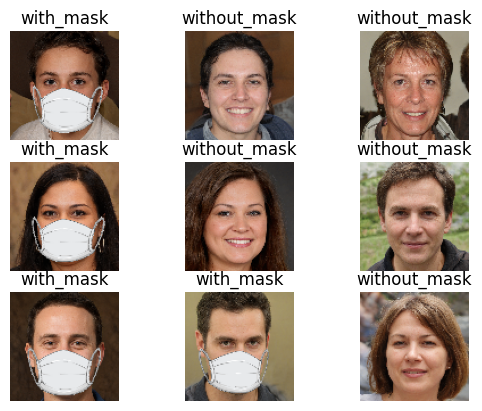

In [ ]:
# Visualize first nine train images
images, labels = next(iter(train_dataset))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_dataset.class_names[labels[i].numpy()])
    plt.axis('off')

plt.show()

### Split the dataset

As the original dataset doesn't contain a test set, you need to create one from the validation dataset!

In the cell below, first determine how many batches of data are available in the validation set using ```tf.data.experimental.cardinality```. Once you know the number of validation batches, move 20% of them to a test set and retain the remaining 80% of the batches in the validation dataset.

In [ ]:
# Split Validation dataset to form Test Dataset

num_batches = tf.data.experimental.cardinality(validation_dataset).numpy()

print("Num of validation batches (BEFORE moving to test): ", num_batches)

num_test_batches = int(num_batches * 0.2)

print("Num of test batches: ", num_test_batches)

test_dataset = validation_dataset.take(num_test_batches)
validation_dataset = validation_dataset.skip(num_test_batches)

print("Num of validation batches (AFTER moving to test): ",
      tf.data.experimental.cardinality(validation_dataset).numpy())

Num of validation batches (BEFORE moving to test):  10
Num of test batches:  2
Num of validation batches (AFTER moving to test):  8


In the below cell, print the number of train, validation and test batches.

In [ ]:
# Print the number of train, validation, test batces
print("Train Batches: ", tf.data.experimental.cardinality(train_dataset).numpy())
print("Validation Batches: ", tf.data.experimental.cardinality(validation_dataset).numpy())
print("Test Batches: ", tf.data.experimental.cardinality(test_dataset).numpy())

Train Batches:  7
Validation Batches:  8
Test Batches:  2


### Configure the dataset for performance

In the cell below, we use buffered prefetching to load images from disk to prevent I/O from blocking. To learn more about this method see the [data performance](https://www.tensorflow.org/guide/data_performance) guide.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

# 2. Define Model

For this assignment, we will build our model differently. We will individually define different sections of the model and then put them all together.

In this section, we will create the different sub-parts of our model, namely:



1.   Data Augmentation
2.   Preprocessing Input
3.   Base Model
4.   Global Averaging Layer
5.   Dropout Layer
6.   Prediction Layer



### 2.1 Data Augmentation
If you don't have a large image dataset, it's a good practice to artificially introduce sample diversity by applying random, yet realistic, transformations to the training images to expand the dataset. For example, you could apply rotations or flip the data horizontally. This helps expose the model to different aspects of the training data and reduce [overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit). You can learn more about data augmentation in this [tutorial](https://www.tensorflow.org/tutorials/images/data_augmentation).

In the cell below, we create the **Data Augmentation** subpart of our final model that sequentially applies 'Random Flip' followed by a 'Random Rotation'.

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

Note: These layers are active only during training (when you call `model.fit`). They are inactive when the model is used in inference mode (`model.evaluate` or `model.predict`).

Let's repeatedly apply these layers to the same image and see the result to better understand why this augmentation can help the dataset generalize its learning.

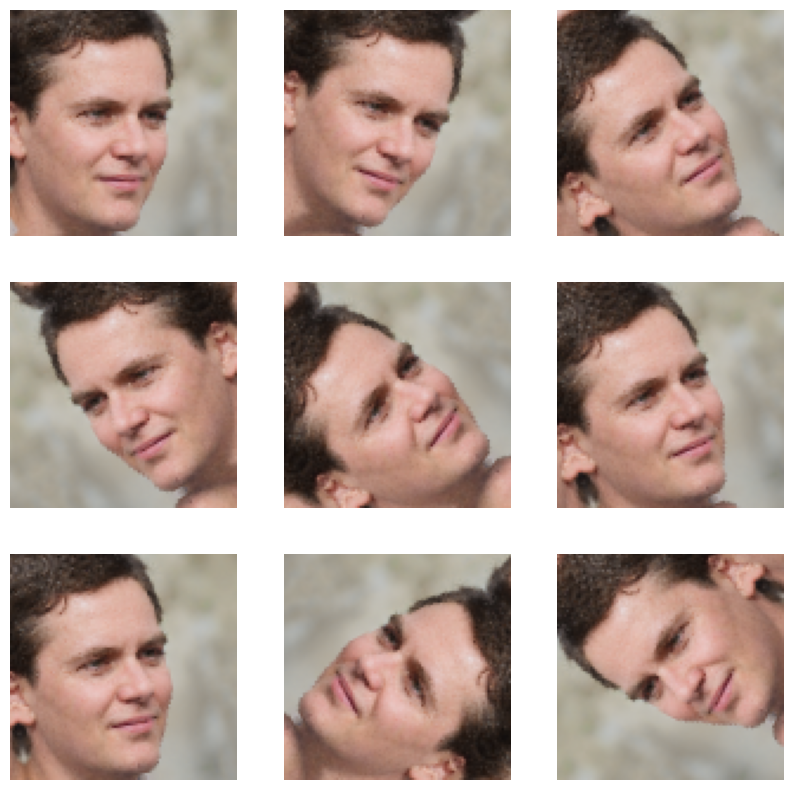

In [ ]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

### 2.2 Input Preprocessing

Soon you will download `tf.keras.applications.MobileNetV2` as your base model. This model expects pixel vaues in the range `[-1,1]`. However, the pixel values in the current dataset images are in the range `[0-255]`. To rescale them, we use the preprocessing method included with the model as shown below. You can read more about it [here](https://www.tensorflow.org/api_docs/python/tf/keras/applications/mobilenet/preprocess_input).

In [ ]:
preprocess_input = tf.keras.applications.mobilenet.preprocess_input

Note: When you use `tf.keras.applications`, be sure to check the API doc to determine if they expect pixels in `[-1,1]` or `[0,1]`

### 2.3 Create the base model

You will create the base model from the **MobileNet V1** model developed at Google. This is pre-trained on the ImageNet dataset, a large dataset consisting of 1.4M images and 1000 classes. ImageNet is a research training dataset with a wide variety of categories including objects such as `jackfruit` and `syringe`. This base of knowledge will help us classify if a person is wearing a mask or not from our specific dataset.

First, you need to pick which layer of MobileNet V1 you will leverage as the high level features you wish to re-use. Since we want to adapt the classifications coming out of the model to a new task, we want to leverage the features coming out of the *last* layer BEFORE the classification layers. In many image models this is the output of the final convolution BEFORE the flatten layer. You may see this layer referred to as the "bottleneck layer" in some texts.

Many machine learning models use the convention that the inputs occur at the bottom and the outputs occur at the top. Therefore, in our case we would like to ignore the top few classification layers. Fortuntately, there is a shortcut to doing this in TensorFlow, **```include_top=False```**. By passing in this parameter we instantiate a MobileNet V1 model pre-loaded with weights trained on ImageNet that doesn't include the classification layers at the top, which is ideal for feature extraction.

In [ ]:
# Create the base model from the pre-trained model MobileNet V1

IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNet(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

17225924/17225924 [==============================] - 0s 0us/step


**Freeze the convolutional layers**

It is important to freeze the convolutional layers before you compile and train the model with transfer learning. Freezing prevents the weights in a given layer from being updated during training. We want to perform this operation because we want to leverage the pre-trained values in the convolutional layers and only learn new classification layer values.

In the below cell, set the appropriate flag of the base model layer to achieve this.

In [ ]:
# Freeze Model
base_model.trainable = False

In [ ]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 48, 48, 32)        864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 48, 48, 32)        128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 48, 48, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 48, 48, 32)        288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 48, 48, 32) 

### 2.4 Global Averaging Layer

To begin the process of generating classifications from the pretrained features, we use a `tf.keras.layers.GlobalAveragePooling2D` layer to convert the feature maps into a single 1024-element feature vector per image.

Global Average Pooling applies average pooling on the spatial dimensions until each spatial dimension is one, and leaves other dimensions unchanged. For example a tensor of shape (64, 3, 3, 1024) would be converted to a tensor of shape (64, 1024) after GlobalAveragePooling2D().

In [ ]:
# Define global avg layer

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()




---


**Question 1**: How does Global Average Pooling differ from Flatten?

**Answer:** Flatten takes in an input Tensor and reshapes it by increasing the number of channels according to the input Tensor's dimensions. Global Average Pooling iteratively applies average pooling on spatial dimensions until each spatial dimension is one. Thus, we can see that the overall difference is in preservation of information. Flatten preserves specific information by increasing channel count, while Global Average Pooling loses some information in its iterative averaging process. Global Average Pooling is argued to be better suited to prevent overfitting.

---

### 2.5 Prediction Layer

Next, define a prediction layer (output layer) that converts the 1024-element feature vector into a single prediction per image. You don't need an activation function here because this prediction will be treated as a `logit`, or a raw prediction value.  

What type of keras layer would you use in the end for predicting classes?


In [ ]:
# Define prediction layer

num_classes = 2

prediction_layer = tf.keras.layers.Dense(num_classes)


### Define Final Model

Finally, you can build the final model by chaining together the Data Augmentation, Input Preprocessing Layer, Base_model, Global Averaging Layer, and Prediction Layer using the [Keras Functional API](https://www.tensorflow.org/guide/keras/functional).

In the below cell, define your input. Apply the multiple layers that you previously created on the input to generate your predicted output. Finally create your model based on the input and output.

**Note:** Ensure that the base_model is not trained.

In [ ]:
# Define Final Model


# input
inputs = tf.keras.Input(shape=(96, 96, 3))

# predicted output
x = data_augmentation(inputs)
x = base_model(x)
x = global_average_layer(x)
x = prediction_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = x

# Final model
model = tf.keras.Model(inputs, outputs)

---


**Question 2**: Briefly describe what each of the 5 layers we defined above do.

**Answer:**
1. Augmentation Layer: This transforms our data, leading to better generalization.
2. Base Model: This acts as a basic feature extractor and has untrainable parameters since this just lays the framework for image classification problems.
3. Global Average Layer: This reduces the size of our Tensor by applying average pooling on the spatial dimensions until each spatial dimension is one.
4. Prediction Layer: This produces the final prediction for each class.
5. Dropout Layer: This randomly excludes parameters during training, working to reduce overfitting and reliance on specific neurons.

---

### Compile the model

Now that you have defined your model, compile it before training. Choose an appropriate Optimizer and Loss Function. Set the flag `from_logits=True` in the Loss Function.

In [ ]:
# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 sequential (Sequential)     (None, 96, 96, 3)         0         
                                                                 
 mobilenet_1.00_224 (Functi  (None, 3, 3, 1024)        3228864   
 onal)                                                           
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 2)                 2050      
                                                                 
 dropout (Dropout)           (None, 2)                 0     

# 3. Train and Evaluate the model

Now that you have your model you can train it! You will see that since the model is leveraging all of the pre-trained features you can improve our model from a random initialization (accuracy of ~50%) to a model with over 95% accuracy quite quickly. **How many epochs do you think you'll need?**

### Train the model

In the below cell, use the appropriate TensorFlow API to train your model.

**Experiment with the number of epochs to achieve above 95% accuracy on your validation dataset**



In [ ]:
# Train Model
num_epochs = 10

history = model.fit(train_dataset,
                    epochs=num_epochs,
                    validation_data=validation_dataset)

Epoch 1/10
7/7 [==============================] - 68s 7s/step - loss: 0.6958 - accuracy: 0.6412 - val_loss: 0.5238 - val_accuracy: 0.7412
Epoch 2/10
7/7 [==============================] - 62s 7s/step - loss: 0.4441 - accuracy: 0.7841 - val_loss: 0.3258 - val_accuracy: 0.8587
Epoch 3/10
7/7 [==============================] - 65s 8s/step - loss: 0.3151 - accuracy: 0.8571 - val_loss: 0.2746 - val_accuracy: 0.8900
Epoch 4/10
7/7 [==============================] - 63s 7s/step - loss: 0.2484 - accuracy: 0.9070 - val_loss: 0.2009 - val_accuracy: 0.9137
Epoch 5/10
7/7 [==============================] - 62s 7s/step - loss: 0.2042 - accuracy: 0.9219 - val_loss: 0.1767 - val_accuracy: 0.9237
Epoch 6/10
7/7 [==============================] - 66s 8s/step - loss: 0.1925 - accuracy: 0.9302 - val_loss: 0.1329 - val_accuracy: 0.9525
Epoch 7/10
7/7 [==============================] - 64s 7s/step - loss: 0.1771 - accuracy: 0.9369 - val_loss: 0.1211 - val_accuracy: 0.9588
Epoch 8/10
7/7 [==================

### Plot Accuracy and Loss Graph

Did you hit you accuracy goal? Did you overshoot and spend some extra time training? When might you have been able to quit? (Answer not required)


In the below cell, plot two graphs. **Plot 1** should contain both training and validation accuracies vs Epochs. **Plot 2** should contain both training and validation losses vs Epochs. Be sure to include a legend, title, and x & y axis labels.

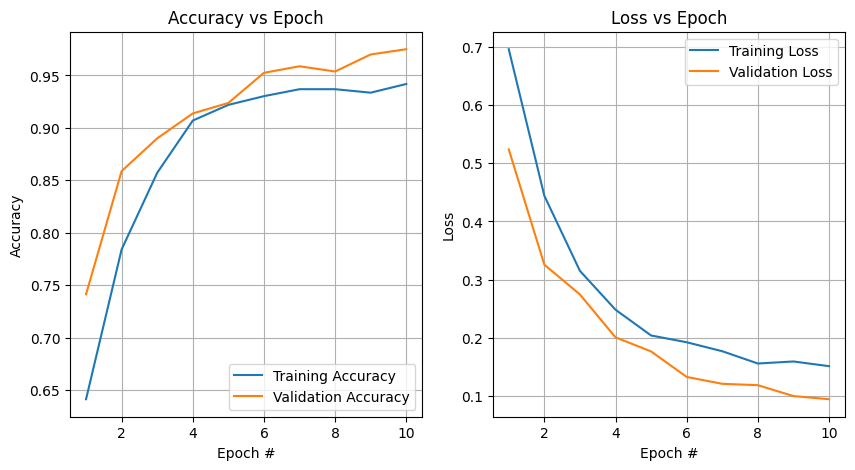

In [ ]:
# Plot Loss and Accuracy graphs

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, num_epochs + 1)
plt.figure(figsize=(10, 5))

# Plot 1
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot 2
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss vs Epoch')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.grid(True)

plt.show()

### Evaluate your model

The last thing you need to do is evaluate your model on the test dataset! In the below cell, use the appropriate tensorflow API to evaluate your model's performance on the test dataset. Display the test accuracy.

In [ ]:
# Evaluate Test Performance
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

2/2 [==============================] - 32s 3s/step - loss: 0.0909 - accuracy: 0.9700
Test Accuracy: 97.00%


Finally, use your model to predict if a person is wearing a mask or not. Lets print the results from a bunch of the images in our test dataset!


Ground Truth Labels:
 [0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0
 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1
 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0]
Model Predictions:
 [1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1
 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0
 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1
 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1
 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0
 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0]



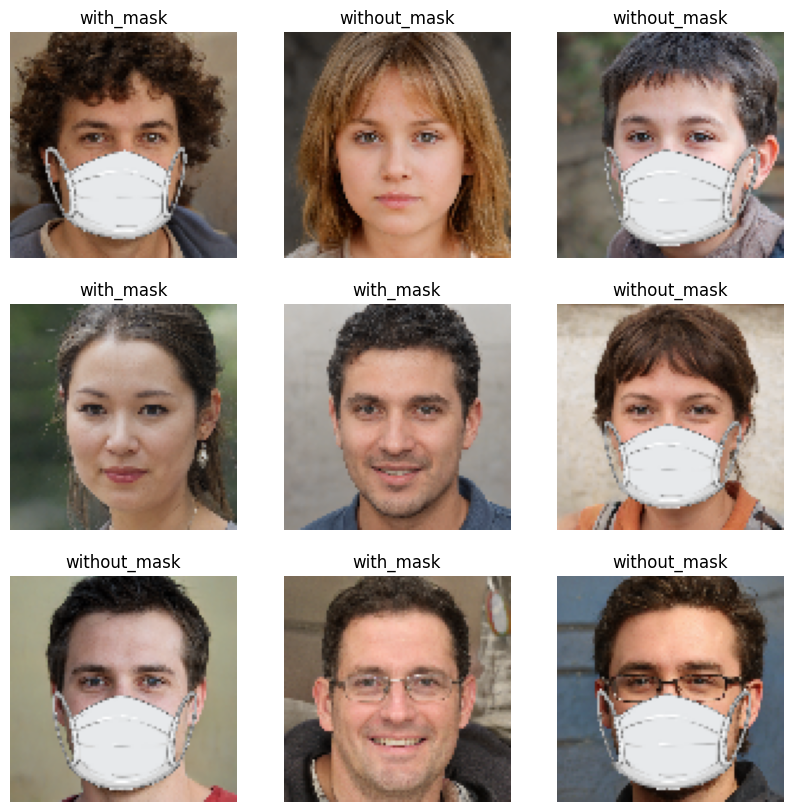

In [ ]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
# Class predicts 0 (without mask) if value < 0.5 else 1 (with mask)
predictions = tf.where(predictions < 0.5, 0, 1)


print('Ground Truth Labels:\n', label_batch)
print('Model Predictions:\n', predictions.numpy())
print()

#My slight change:
class_names = ['without_mask', 'with_mask']
#class_names = train_dataset.class_names
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")